**First we must import the libraries and data that we'll be using.**

In [1]:
!pip install yfinance 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")
try:
    import yfinance as yf    # import  Yahoo! Finance
except:
    !pip install yfinance # install Yahoo! Finance
    import yfinance as yf    # import  Yahoo! Finance

from pandas_datareader import data as pdr
yf.pdr_override()
yf

from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

In [3]:
# inputs
Stocks = ['AAPL', 'RDFN', 'CDK', 'SONY', 'HPQ', 'MSFT', 'TTWO', 'ARW', 'AMD', 'NVDA']
start = datetime.fromisoformat('2018-11-26')
end = datetime.fromisoformat('2021-12-09')

In [4]:
#individual company data
Sega = DataReader('AAPL', start, end)
SquareEnix = DataReader('RDFN', start, end)
Tencent = DataReader('CDK', start, end)
Sony = DataReader('SONY', start, end)
Nintendo = DataReader('HPQ', start, end)
Microsoft = DataReader('MSFT', start, end)
TakeTwo = DataReader('TTWO', start, end)
EA = DataReader('ARW', start, end)
AMD = DataReader('AMD', start, end)
Nvidia = DataReader('NVDA', start, end)

#10 Selec
df = pd.DataFrame()
data = []
for symbol in Stocks:
    df = pd.merge(df, pd.DataFrame(yf.download(symbol, fields='price', 
                           start=start, end=end)['Adj Close']), 
                           right_index=True, left_index=True, how='outer')
       
    # Appends tickers which have data
    data.append(symbol)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
df.columns = data
df = df.dropna(axis='columns')
print("The head of the data")
df.head()

The head of the data


,AAPL,RDFN,CDK,SONY,HPQ,MSFT,TTWO,ARW,AMD,NVDA
Date,,,,,,,,,,
2018-11-26,42.379292,15.360000,48.232063,51.020000,20.710672,102.955841,110.440002,74.050003,20.080000,37.979656
2018-11-27,42.287067,15.460000,47.090317,51.369999,20.638035,103.603722,109.559998,73.300003,21.049999,38.148399
2018-11-28,43.913116,16.280001,48.203281,52.910000,21.273609,107.452362,110.629997,75.349998,21.340000,39.721684
2018-11-29,43.575771,17.120001,48.145714,51.880001,20.756073,106.553062,111.910004,76.470001,21.430000,39.088257
2018-11-30,43.340359,16.959999,48.501785,52.820000,20.883184,107.229950,109.669998,76.970001,21.299999,40.596050


In [6]:
print("The tail of the data")
df.tail()


The tail of the data


,AAPL,RDFN,CDK,SONY,HPQ,MSFT,TTWO,ARW,AMD,NVDA
Date,,,,,,,,,,
2021-11-29,160.240005,40.590000,39.340000,121.440002,35.930000,336.630005,169.600006,124.419998,161.910004,333.719147
2021-11-30,165.300003,40.689999,38.639999,121.849998,35.279999,330.589996,165.880005,121.650002,158.369995,326.720001
2021-12-01,164.770004,38.160000,38.799999,119.370003,36.459999,330.079987,160.350006,120.440002,149.110001,314.350006
2021-12-02,163.759995,39.430000,40.209999,120.160004,37.639999,329.489990,161.380005,122.860001,150.679993,321.260010
2021-12-03,160.261398,38.500000,40.035000,119.351097,37.349998,319.009888,164.445007,122.930000,142.339996,304.190002


In [7]:
print("More details about the data.")
df.describe()

More details about the data.


,AAPL,RDFN,CDK,SONY,HPQ,MSFT,TTWO,ARW,AMD,NVDA
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,91.637493,37.429344,47.212433,76.449726,21.754516,191.095403,142.793747,86.564003,62.193871,105.441052
std,38.816042,20.386043,5.699295,23.302224,5.620796,64.347304,32.183695,20.210360,32.160057,67.951667
min,34.508713,10.330000,29.338095,42.029999,12.514389,91.023148,84.629997,41.060001,16.650000,31.566706
25%,51.780189,18.412500,43.306541,55.914999,17.717957,134.408958,116.922503,71.134998,31.210001,45.135149
50%,80.368076,32.320000,47.604015,70.590000,19.400731,183.770981,135.224998,79.805000,54.519999,88.001888
75%,127.041813,51.875000,51.564985,99.287500,27.398062,235.586140,170.607502,105.222498,85.262499,138.279015
max,165.300003,96.589996,60.194782,125.239998,37.639999,343.109985,213.339996,129.600006,161.910004,333.719147


To help us see what we're looking at, let's plot the stock prices of all 10 companies. Notice the changes in Sega are barely noticble.

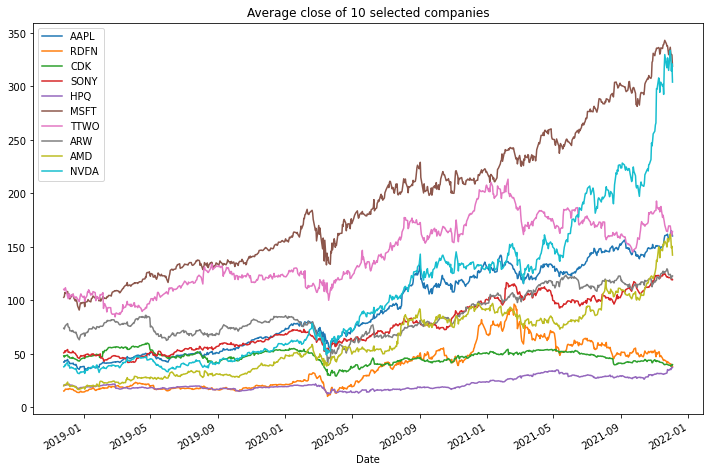

In [8]:
Sega['Adj Close'].plot(label = 'AAPL', figsize = (12,8))
SquareEnix['Adj Close'].plot(label = 'RDFN')
Tencent['Adj Close'].plot(label = 'CDK')
Sony['Adj Close'].plot(label = 'SONY')
Nintendo['Adj Close'].plot(label = 'HPQ')
Microsoft['Adj Close'].plot(label = 'MSFT')
TakeTwo['Adj Close'].plot(label = 'TTWO')
EA['Adj Close'].plot(label = 'ARW')
AMD['Adj Close'].plot(label = 'AMD')
Nvidia['Adj Close'].plot(label = "NVDA")
plt.title('Average close of 10 selected companies')
plt.legend()

**This week is really alarming! stocks are dropping like crazy.**

In [9]:
rets = df.pct_change(periods=3)
corr = rets.corr()
d = {'Risk':rets.std(), 'Expected Returns':rets.mean()}
print('Table: Risk v Returns')
tables = pd.DataFrame(data=d)
tables   

Table: Risk v Returns


,Risk,Expected Returns
AAPL,0.033499,0.005853
RDFN,0.080112,0.006752
CDK,0.034955,-0.000123
SONY,0.031402,0.003804
HPQ,0.043960,0.003266
MSFT,0.027252,0.004875
TTWO,0.034852,0.002135
ARW,0.036770,0.002657
AMD,0.054488,0.009219
NVDA,0.047993,0.009457


Text(0, 0.5, 'SD')

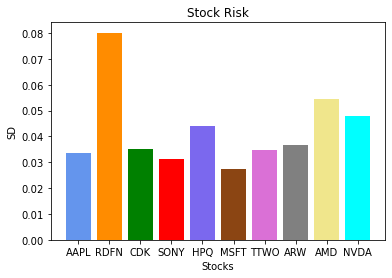

In [10]:
plt.bar(rets.columns, rets.std(), color=['cornflowerblue', 'darkorange', 'green', 'red', 'mediumslateblue', 'saddlebrown', 'orchid', 'grey', 'khaki', 'cyan'])
plt.title("Stock Risk")
plt.xlabel("Stocks")
plt.ylabel("SD")

Text(0, 0.5, 'Returns')

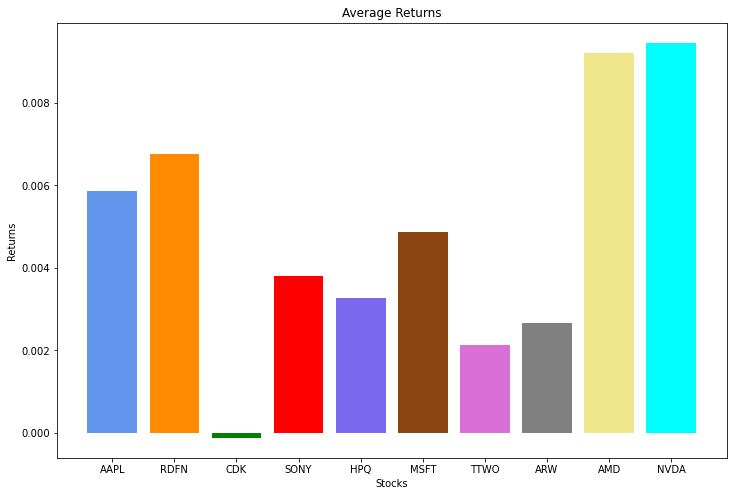

In [11]:
plt.figure(figsize=(12, 8))
plt.bar(rets.columns, rets.mean(), color=['cornflowerblue', 'darkorange', 'green', 'red', 'mediumslateblue', 'saddlebrown', 'orchid', 'grey', 'khaki', 'cyan'])
plt.title("Average Returns")
plt.xlabel("Stocks")
plt.ylabel("Returns")

**CDK Global has very little return, AMD and Nvidia still have the highest.**

**Now let's look at these two peices of information together. Plotting in both a bar and a scatter plot will make it easier to see what has the highest and lowest risks and rewards.**

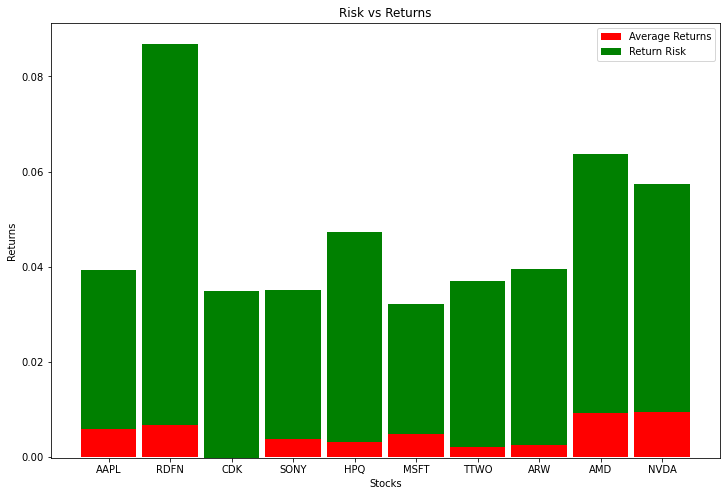

In [12]:
Stocks = ['AAPL', 'RDFN', 'CDK', 'SONY', 'HPQ', 'MSFT', 'TTWO', 'ARW', 'AMD', 'NVDA']
ind = [x for x, _ in enumerate(Stocks)]
plt.figure(figsize=(12, 8))
plt.bar(ind, rets.mean(), width=0.9, label='Average Returns', color='r')
plt.bar(ind, rets.std(), width=0.9, label='Return Risk', color='g', bottom=rets.mean())

plt.xticks(ind, Stocks)
plt.ylabel("Returns")
plt.xlabel("Stocks")
plt.legend(loc="upper right")
plt.title('Risk vs Returns')
plt.show()

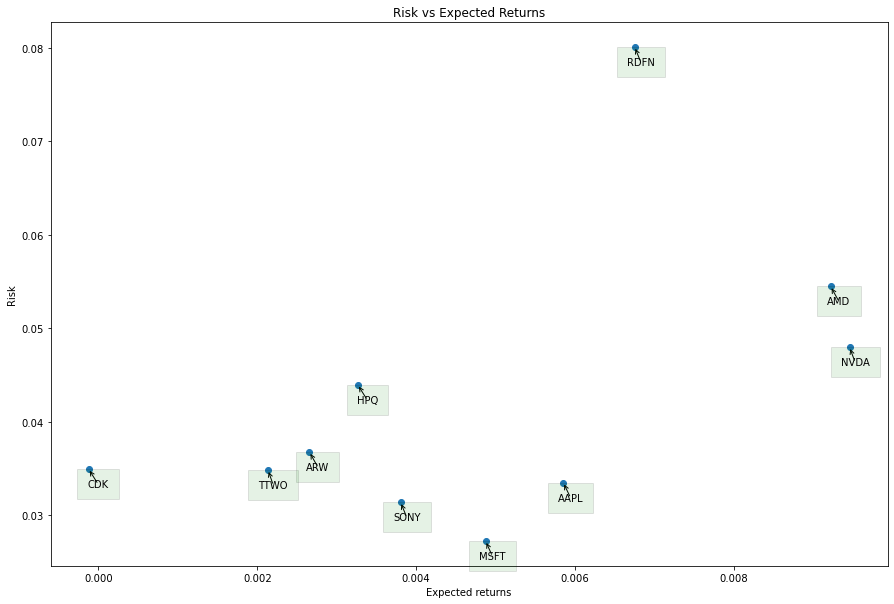

In [13]:
plt.figure(figsize=(15, 10))
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.title('Risk vs Expected Returns')
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'square,pad=1', fc = 'green', alpha = 0.1),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    

**Investment for the week of 12/03**
I also got rid of my 150 shares of apple stock. Luckily I was able to make money on it before the whole stock market seemed to crash, overall this was a really bad week for trading. I tried to invest in companies I'm hoping bounce back after hitting a low this week. Despite being really risky I decided to invest 50 shares in redfin stock this week. I also bought 50 more shares in NVDA and MSFT thinking they can't go any lower and hoping they bounce back next week. I either made some really bad decisions ignoring my intuition or the risks can pay off, we won't know until next week.